# Going Deeper - The Mechanics of TensorFlow

In the previous chapter, we trained a multilayer perceptron to classify MNIST digits, using various aspects of the TensorFlow Python API. That was a great way to dive us straight into some hands-on experience with TensorFlow neural network training and machine learning.

In this chapter, we will now shift our focus squarely on to TensorFlow itself, and explore in detail the impressive mechanics and features that TensorFlow offers:

* Key features and advantages of TensorFlow
* TensorFlow ranks and tensors
* Understanding and working with TensorFlow graphs
* Working with TensorFlow variables
* TensorFlow operations with different scopes
* Common tensor transformations: working with ranks, shapes, and types
* Transforming tensors as multidimensional arrays
* Saving and restoring a model in TensorFlow
* Visualizing neural network graphs with TensorBoard

We will stay hands-on in this chapter, of course, and implement graphs throughout the chapter to explore the main TensorFlow features and concepts. Along the way, we will also revisit a regression model, explore neural network graph visualization with TensorBoard, and suggest some ways that you could explore visualizing more of the graphs that you will make through this chapter. 

# Keys features of TensorFlow

TensorFlow gives us a scalable, multiplataform programming interface for implementing and running machine learning algorithms. The TensorFlow API has been relatively stable and mature since its 1.0 release in 2017. There are other deep learning libraries available, but they are still very experimental by comparison. 

A key feature of TensorFlow that we already noted is its ability to work with single or multiple GPUs. This allows users to train machine learning models very efficiently on large-scale systems. 

TensorFlow has strong growth drivers. Its development in funded and supported by Google, and so a large team of software engineers work on improvements continuosly. TensorFlow also has strong support from open source developers, who avidly contribute and provide user feedback. This has made the TensorFlow library more useful to both academic researchers and developers in their industry. A further consequence of these factors is that TensorFlow has extensive documentation and tutorials to help new users. 

Last but not least among these key features, TensorFlow supports mobile deployment, which makes it a very suitable tool for production. 

# TensorFlow ranks and tensors

The TensorFlow library lets users define operations and functions over tensors as computational graphs. Tensors are a generalizable mathematical notation for multidimensional arrays holding data values, where the dimensionality of a tensor is typically referred to as its **rank**. 

We have worked mostly, so far, with tensors of rank zero to two. For instance, a scalar, a single number such as an integer or float, is a tensor of rank 0. A vector is a tensor of rank 1, and a matrix is a tensor of rank 2. But, it does not stop here. The tensor notation can be generalized to higher dimensions - as we will see in the next chapter, when we work with an input of rank 3 and weight tensors of rank 4 to support images with multiple color channels. 

To make the concept of a **tensor** more intuitive, consider the following figure, which represents tensors of ranks 0 and 1 in the first row, and tensors of ranks 2 and 3 in the second row:

<img src='images/14_01.png'>

# How to get the rank and shape of a tensor

We can use the *tf.rank* function to get the rank of a tensor. It is important to note that *tf.rank* will return a tensor as output, and in order to get the actual value, we will need to evaluate that tensor. 

In addition to the tensor rank, we can also get the shape of a TensoFlow tensor (similar to the shape of a NumPy array). For example, if $x$ is a tensor, we can get its shape using *x.get_shape()*, which will return an object of a special class called *TensorShape*.

See the following examples on how to use the *tf.rank* function and the *get_shape* method of a tensor. The following code example illustrates how to retrieve the rank and shape of the tensor objects in a TensorFlow session:

In [1]:
import tensorflow as tf
import numpy as np

g = tf.Graph()

## define the computation graph
with g.as_default():
    ## define tensors t1, t2, t3
    t1 = tf.constant(np.pi)
    t2 = tf.constant([1, 2, 3, 4])
    t3 = tf.constant([[1, 2], [3, 4]])
    
    ## get their ranks
    r1 = tf.rank(t1)
    r2 = tf.rank(t2)
    r3 = tf.rank(t3)
    
    ## get their shapes
    s1 = t1.get_shape()
    s2 = t2.get_shape()
    s3 = t3.get_shape()
    
    print('Shapes:', s1, s2, s3)
    
with tf.Session(graph=g) as sess:
    print('Ranks:', r1.eval(), r2.eval(), r3.eval())

Shapes: () (4,) (2, 2)
Ranks: 0 1 2


As we can see, the rank of the *t1* tensor is 0 since it is just a scalar (corresponding to the *[]* shape). The rank of the *t2* vector is 1, and since it has four elements, its shape is the one-element tuple *(4, )*. Lastly, the shape of the $2 \times 2$ matrix *t3* is  2; thus, its corresponding shape is given by the *(2, 2)* tuple. 

# Understanding TensorFlow's computation graphs

TensorFlow relies on building a computation graph at its core, and it uses this computation graph to derive relationships between tensors from the input all the way to the output. Let's say, we have rank 0 (scalars) and tensors *a*, *b*, and *c* and we want to evaluate $z = 2 \times (a - b) + c$. This evaluation can be represented as a computation graph, as shown in the following figure: 

<img src='images/14_02.png'>

As we can see, the computation graph is simply a network of nodes. Each node resembles an operation, which applies a function to its input tensor or tensors and returns zero or more tensors as the output. 

TensorFlow builds this computation graph and uses it to compute the gradients accordingly. The individual steps for building and compiling such a computation graph in TensorFlow are as follows: 

1. Instantiate a new, empty computation graph. 
2. Add nodes (the tensors and operations) to the computation graph. 
3. Execute the graph:
    1. Start a new session
    2. Initialize the variables in the graph
    3. Run the computation graph in this session
   
So, let's create a graph for evaluating $z = 2 \times (a - b) + c$, as shown in the previous figure, where *a*, *b*, and *c* are scalars (single numbers). Here, we define them as TensorFlows constants. A graph can be created by calling *tf.Graph()*, then nodes can be added to it as follows:

In [2]:
g = tf.Graph()

with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')
    
    z = 2*(a-b) + c

In this code, we added nodes to the *g* graph using *with g.as_default()*. If we do not explicitly create a graph, there is always a default graph, and therefore, all the nodes are added to the default graph. In this book, we try to avoid working with the default graph for clarity. This approach is specially useful when we are developing code in a Jupyter notebook, as we avoid pilling up unwanted nodes in the default graph by accident. 

A TensorFlow session is an environment in which the operations and tensors of a graph can be executed. A session object is created by calling *tf.Session* that can receive an existing graph (here, *g*) as an argument, as in *tf.Session(graph=g)*, otherwise, it will launch the default graph, which might be empty. 

After launching a graph in a TensorFlow session, we can execute it nodes; that is, evaluating its tensors or executing its operators. Evaluating each individual tensor involves calling its *eval* method inside the current session. When evaluating a specific tensor in the graph, TensorFlow has to execute all the preceding nodes in the graph until it reaches that particular one. In case there are one or more placeholders, they would need to be fed, as we will see later in the next section. 

Quite similarly, executing operations can be done using a session's *run* method. In the previous example, *train_op* is an operator that does not return any tensor. This operator can be executed as *train_op.run()*. Furthermore, there is a universal way of runnning both tensors and operators: *tf.Session().run()*. Using this method, as we will see later on as well, multiple tensors and operators can be placed in a list or tuple. As a result, *tf.Session().run()* will return a list or tuple of the same size. 

Here, we will launch the previous graph in a TensorFlow session and evaluate the tensor *z* as follows:

In [3]:
with tf.Session(graph=g) as sess:
    print('2*(a-b)+c => ', sess.run(z))

2*(a-b)+c =>  1


Remember that we define tensors and operations in a computation graph context within TensorFlow. A TensorFlow session is then used to execute the operations in the graph and fetch and evaluate the results. 

In this section, we saw how to define a computation graph, how to add nodes to it, and how to evaluate the tensors in a graph within a TensorFlow session. We will now take a deeper look into the different types of nodes that can appear in a computation graph, including placeholders and variables. Along the way, we will see some other operators that do not return a tensor as the output. 

# Placeholders in TensorFlow

TensorFlow has special mechanisms for feeding data. One of these mechanisms is the use of placeholders, which are predefined tensors with specific types and shapes. 

These tensors are added to the computation graph using the *tf.placeholder* function, and they do not contain any data. However, upon the execution of certain nodes in the graph, these placeholders need to be fed with data arrays. 

In the following sections, we will see how to define placeholders in a graph and how to feed them with data values upon execution. 

## Defining placeholders

As you now know, placeholders are defined using the *tf.placeholder* function. When we define placeholders, we need to decide what their shape ant type should be, according to the shape and type of the data that will be fed through them upn execution. 

Let's start with a simple example. In the following code, we will define the same graph that was shown in the previous section for evaluating $z = 2 \times (a-b) + c$. This times, however, we use placeholders for the scalars *a*, *b*, and *c*. Also, we store the intermediate tensors associated with *r1* and *r2*, as follows:

In [4]:
import tensorflow as tf

g = tf.Graph()
with g.as_default():
    tf_a = tf.placeholder(tf.int32, shape=[], name='tf_a')
    tf_b = tf.placeholder(tf.int32, shape=[], name='tf_b')
    tf_c = tf.placeholder(tf.int32, shape=[], name='tf_c')
    
    r1 = tf_a - tf_b
    r2 = 2*r1
    z = r2 + tf_c

In this code, we defined three placeholders, named *tf_a*, *tf_b*, and *tf_c*, using type *tf.int32* (32-bit integers) and set their shape via *shape=[]* since they are scalars (tensors of rank 0). In the current book, we always precede the placeholder objects with *tf_* for clarity and to be able to distinguish them from the other tensors. 

Note that in the previous code example, we were dealing with scalars, and therefore, their shapes were specified as *shape=[]* However, it is very straightforward to define placeholders of higher dimensions. For example, a rank 3 placeholder of type *float* and shape $3 \times 4 \times 5$ can be defined as *tf.placeholder(dtype=tf.float32, shape=[2, 3, 4])*.

## Feeding placeholders with data

When we execute a node in the graph, we need to create a Python **dictionary** to feed the values of placeholders with data arrays. We do this according to the type and shape of the placeholders. This dictionary is passed as the input argument *feed_dict* to a session's *run* method. 

In the previous graph, we added three placeholders of the type *tf.int32* to feed scalars for computing *z*. Now, in order to evaluate the result tensor *z*, we can feed arbitrary integer values (here, 1, 2, and 3) to the placeholders, as follows:

In [5]:
with tf.Session(graph=g) as sess:
    feed = {tf_a: 1, tf_b: 2, tf_c: 3}
    print('z:', sess.run(z, feed_dict=feed))

z: 1


This means that having extra arrays for placeholders does not cause any error; it is just redundant to do so. However, if a placeholder is needed for the execution of a particular node, and is not provided via the *feed_dict* argument, it will cause a runtime error. 

## Defining placeholders for data arrays with varying batchsizes

Sometimes, when we are developing a neural network model, we may deal with mini-batches of data that have different sizes. For example, we may train a neural network with a specific mini-batch size, but we want to use the network to make predictions on one or more data point. 

A useful feature of placeholders is that can specify *None* for the dimension that is varying in size. For example, we can create a placeholder of rank 2, where the first dimension is unknown (or may vary), as shown here:

In [6]:
import tensorflow as tf

g = tf.Graph()

with g.as_default():
    tf_x = tf.placeholder(tf.float32, 
                          shape=[None, 2], 
                          name='tf_x')
    
    x_mean = tf.reduce_mean(tf_x, axis=0, name='mean')

Then, we can evaluate *x_mean* with two different input, *x1* and *x2*, which are NumPy arrays of shape *(5, 2)* and *(10, 2)*, as follows:

In [7]:
import numpy as np

np.random.seed(123)
np.set_printoptions(precision=2)

with tf.Session(graph=g) as sess:
    x1 = np.random.uniform(low=0, high=1, size=(5, 2))
    print('Feeding data with shape ', x1.shape)
    print('Result:', sess.run(x_mean, feed_dict={tf_x: x1}))
    
    x2 = np.random.uniform(low=0, high=1, size=(10, 2))
    print('Feeding data with shape ', x2.shape)
    print('Result:', sess.run(x_mean, feed_dict={tf_x: x2}))

Feeding data with shape  (5, 2)
Result: [0.62 0.47]
Feeding data with shape  (10, 2)
Result: [0.46 0.49]


Lastly, if we try printing the object *tf_x*, we will get *Tensor("tf_x:0", shape=(?, 2), dtype=float32)*, which shows that the shape of this tensor is *(?, 2)*

# Variables in TensorFlow

In the context of TensorFlow, variables are a special type of tensor objects that allow us to store and update the parameters of our models in a TensorFlow session during training. The following sections explain how we can define variables in a graph, initialize those variables in a session, organize variables via the so-called variable scope, and reuse existing variables. 

## Defining variables

TensorFlow variables store the parameters of a model than can be updated during training, for example, the weights in the input, hidden and output layers of a neural network. When we define a variable, we need to initialize it with a tensor of values. 

TensorFlow provides two ways for dealing with variables: 
* *tf.Variable(<initial-value>, name='variable-name')*
* *tf.get_variable(name, ...)*

The first one, *tf.Variable*, is a class that creates an object for a new variable and adds it to the graph. Note that *tf.Variable* does not have an explicit way to determine *shape* and *dtype*; the shape and type are set to be the same as those of the initial values. 

The second option, *tf.get_variable*, can be used to **reuse** an existing variable with a given name (if the name exists in the graph) or create a new one if the name does not exist. In this case, the name becomes critical; that is probably why it has to be placed as the first argument to this function. Furthermore, *tf.get_variable* provides an explicit way to set *shape* and *dtype*; these parameters are only required when creating a new variable, not reusing existing ones. 

The advantage of *tf.get_variable* over *tf.Variable* is twofold: *tf.get_variable* allows us to reuse existing variables and it already uses the popular Xavier/Glorot initialization scheme by default. Besides the initializer, the *get_variable* function provides other parameters to control the tensor, such as adding a regularizer for the variable. 

**Xavier/Glorot initialization**

In the early development of deep learning, it was observed that random uniform or random normal weight initialization could often result in a poor performance of the model during training. 

In 2010, Xavier Glorot and Yoshua Bengio investigated the effect of initialization and proposed a novel, more robust initialization scheme to facilitate the training of deep networks. 

The general idea behind Xavier initialization is to roughly balance the variance of the gradients across different layers. Otherwise, one layer may get too much attention during training while the other layer lags behind. 

According to the research paper by Glorot and Bengio, if we want to initialize the weights from uniform distribution, we should choose the interval of this uniform distribution as follows: 

$$W ~ Uniform \left(-\frac{\sqrt{6}}{\sqrt{n_{in} + n_{out}}}, \frac{\sqrt{6}}{\sqrt{n_{in} + n_{out}}} \right)$$

Here, $n_{in}$ is the number of input neurons that are multiplied with the weights, and $n_{out}$ is the number of output neurons that feed into the next layer. For initializing the weights from Gaussian (normal) distribution, the authors recommended choosing the standard deviation of this Gaussian to be $\sigma = \frac{\sqrt{2}}{\sqrt{n_{in} + n_{out}}}$.

TensorFlow support Xavier initialization in both uniform and normal distributions of weights. 

In either initialization technique, it is important to note that the initial values are not set until we launch the graph in *tf.Session* and explicitly run the initializer operator in that session. In fact, the required memory for a graph is not allocated until we initialize the variables in a TensorFlow session. 

Here is an example of creating a variable object where the initial values are created from a NumPy array. The *dtype* data type of this tensor is *tf.int64*, which is automatically **inferred** from its NumPy array input: 

In [8]:
import tensorflow as tf
import numpy as np

g1 = tf.Graph()

with g1.as_default():
    w = tf.Variable(np.array([[1, 2, 3, 4], 
                              [5, 6, 7, 8]]), name='w')
    print(w)

<tf.Variable 'w:0' shape=(2, 4) dtype=int64_ref>


## Initializing variables

Here, it is critical to understand that tensors defined as variables are not allocated in memory and contain no values until they are initialized. Therefore, before executing any node in the computation graph, we *must* initialize the variables that are within the path to the node that we want to execute. 

This initialization process refers to allocating memory for the associated tensors and assigning their initial values. TensorFlow provides a function named *tf.global_variables_initializer* that returns an operator for initializing all the variables that exist in a computation graph. Then, executing this operator will initialize the variables as follows:

In [9]:
with tf.Session(graph=g1) as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(w))

[[1 2 3 4]
 [5 6 7 8]]


We can also store this operator in an object such as *init_op = tf.global_variables_initializer()* and execute this operator later using *sess.run(init_op)* or *init_op.run()*. However, we need to make sure that this operator is created after we define all the variables. 

For example, in the following code, we define the variable *w1*, then we define the operator *init_op*, followed by the variable *w2*: 

In [10]:
import tensorflow as tf

g2 = tf.Graph()

with g2.as_default():
    w1 = tf.Variable(1, name='w1')
    init_op = tf.global_variables_initializer()
    w2 = tf.Variable(2, name='w2')

Now, let's evaluate *w1* as follows:

In [11]:
with tf.Session(graph=g2) as sess:
    sess.run(init_op)
    print('w1:', sess.run(w1))

w1: 1


This works fine. Now, let's try evaluating *w2*: 

In [12]:
with tf.Session(graph=g2) as sess:
    sess.run(init_op)
    print('w2:', sess.run(w2))

FailedPreconditionError: Attempting to use uninitialized value w2
	 [[Node: _retval_w2_0_0 = _Retval[T=DT_INT32, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](w2)]]

As shown in the code example, executing the graph raises an error because *w2* was not initialized via *sess.run(init_op)*, and therefore, could not be evaluated. The operator *init_op* was defined prior to adding *w2* to the graph; thus, executing *init_op* will not initialize *w2*. 

## Variable scope

In this subsection, we are going to discuss *scoping*, which is an important concept in TensorFlow, and especially useful if we are constructing large neural network graphs. 

With variable scopes, we can organize the variables into separate subparts. When we create a variable scope, the name of operations and tensors that are created within that scope are prefixed with that scope, and those scopes can further be nested. For example, if we have two subnetworks, where each subnetwork has several layers, we can define two scopes named *'net_A'* and *'net_B'*, respectively. Then, each layer will be defined within one of these scopes. 

Let's see how the variable names will turn out in the following code example:

In [13]:
import tensorflow as tf

g = tf.Graph()

with g.as_default():
    with tf.variable_scope('net_A'):
        with tf.variable_scope('layer-1'):
            w1 = tf.Variable(tf.random_normal(shape=(10, 4)), name='weights')
        with tf.variable_scope('layer-2'):
            w2 = tf.Variable(tf.random_normal(shape=(20, 10)), name='weights')
    with tf.variable_scope('net_B'):
        with tf.variable_scope('layer-1'):
            w3 = tf.Variable(tf.random_normal(shape=(10, 4)), name='weights')
        
    print(w1)
    print(w2)
    print(w3)

<tf.Variable 'net_A/layer-1/weights:0' shape=(10, 4) dtype=float32_ref>
<tf.Variable 'net_A/layer-2/weights:0' shape=(20, 10) dtype=float32_ref>
<tf.Variable 'net_B/layer-1/weights:0' shape=(10, 4) dtype=float32_ref>


Notice that the variables names are now prefixed with their nested scopes, separated by the forward slash *'/'* symbol. 

## Reusing variables

Let's imagine that we are developing a somewhat complex neural network model that has a classifier whose input data comes from more than once source. For example, we will assume that we have data $(X_A, y_A)$ coming from source $A$ and data $(X_B, y_B)$ comes from the source $B$. In this example, we will design our graph in such a way that it will use the data from only one source as input tensor to build the network. Then, we can feed the data from the other source to the same classifier. 

In the following example, we assume that data from source $A$ is fed through placeholder, and source $B$ is the output of a generator network. We will build by calling the *build_generator* function within the *generator* scope, then we will add a classifier by calling *build_classifier* within the *classifier* scope: 

In [14]:
import tensorflow as tf

def build_classifier(data, labels, n_classes=2):
    data_shape = data.get_shape().as_list()
    weights = tf.get_variable(name='weights', 
                              shape=(data_shape[1], 
                                     n_classes), 
                              dtype=tf.float32)
    bias = tf.get_variable(name='bias', 
                           initializer=tf.zeros(shape=n_classes))
    logits = tf.add(tf.matmul(data, weights), bias, name='logits')
    return logits, tf.nn.softmax(logits)

def build_generator(data, n_hidden):
    data_shape = data.get_shape().as_list()
    w1 = tf.Variable(tf.random_normal(shape=(data_shape[1], n_hidden)), name='w1')
    b1 = tf.Variable(tf.zeros(shape=n_hidden), name='b1')
    hidden = tf.add(tf.matmul(data, w1), b1, name='hidden_pre-activation')
    hidden = tf.nn.relu(hidden, 'hidden_activation')
    
    w2 = tf.Variable(tf.random_normal(shape=(n_hidden, data_shape[1])), name='w2')
    b2 = tf.Variable(tf.zeros(shape=data_shape[1]), name='b2')
    
    output = tf.add(tf.matmul(hidden, w2), b2, name='output')
    return output, tf.nn.sigmoid(output)

batch_size = 64
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100), 
                          dtype=tf.float32, 
                          name='tf_X')
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X, n_hidden=50)
    
    with tf.variable_scope('classifier') as scope:
        cls_out1 = build_classifier(data=tf_X, 
                                    labels=tf.ones(shape=batch_size))
        scope.reuse_variables()
        cls_out2 = build_classifier(data=gen_out1[1], labels=tf.zeros(shape=batch_size))

Notice that we have called the *build_classifier* function two times. The first call causes the building of the network. Then, we call *scope.reuse_variables()* and call that function again. As a result, the second call does not create new variables; instead, it reuses the same variables. Alternatively, we could reuse the variables by specifying the *reuse=True* parameter, as follows:

In [15]:
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100), 
                          dtype=tf.float32, 
                          name='tf_X')
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X, n_hidden=50)
    
    with tf.variable_scope('classifier'):
        cls_out1 = build_classifier(data=tf_X, 
                                    labels=tf.ones(shape=batch_size))
        
    with tf.variable_scope('classifier', reuse=True):
        cls_out2 = build_classifier(data=gen_out1[1], labels=tf.zeros(shape=batch_size))

While we have discussed how to define computational graphs and variables in TensorFlow, a detailed discussion of how we can compute gradients in a computational graph is beyond the scope of this book, where we use TensorFlow's convenient optimizer classes that perform backpropagation automatically for us. 

# Bulding a regression model

Since we have explored placeholders and variables, let's build an example model for regression analysis, similar to the one we created in previous chapter, where our goal is to implement a linear regression model: $ŷ = wx + b$. 

In this model, $w$ and $b$ are the two parameters of this simple regression model that need to be defined as variables. Note that $x$ is the input of the model, which we can define as placeholder. Furthermore, recall that for training this model, we need to formulate a cost function. Here, we use the **Mean Squared Error (MSE)** cost function:

$$MSE = \frac{1}{n}\sum_{i=1}^n \left(y^{(i)}-ŷ^{(i)}\right)^2$$

Here, $y$ is the true value, which is given as the input to this model for training. Therefore, we need to define $y$ as a placeholder as well. Finally, $ŷ$ is the prediction output, which will be computed using TensorFlow operations - *tf.matmul* and *tf.add*. Recall that TensorFlow operations return zero or more tensors; here, *tf.matmul* and *tf.add* return one tensor. 

We can also use the overloaded operator *+* for adding two tensors; however, the advantage of *tf.add* is that we can provide an additional name for the resulting tensor via the *name* parameter. 

So, let's summarize all our tensors with their mathematical notations and coding naming, as follows:

* Input $x$: *tf_x* defined as a placeholder
* Input $y$: *tf_y* defined as a placeholder
* Model parameter $w$: *weight* defined as a variable
* Model parameter $b$: *bias* defined as a variable
* Model output $$ŷ: $y_hat* returned by the TensorFlow operations to compute the prediction using the regression model

The code to implement this simple regression model is as follows:

In [16]:
import tensorflow as tf
import numpy as np

g = tf.Graph()

with g.as_default():
    tf.set_random_seed(123)
    ## placeholders
    tf_x = tf.placeholder(shape=(None), 
                          dtype=tf.float32, 
                          name='tf_x')
    tf_y = tf.placeholder(shape=(None), 
                          dtype=tf.float32, 
                          name='tf_y')
    
    ## define the variable (model parameters)
    weight = tf.Variable(tf.random_normal(shape=(1, 1), 
                                          stddev=0.25), 
                         name='weight')
    bias = tf.Variable(0.0, name='bias')
    
    ## build the model
    y_hat = tf.add(weight * tf_x, bias, name='y_hat')
    
    ## compute the cost
    cost = tf.reduce_mean(tf.square(tf_y - y_hat), name='cost')
    
    ## train the model
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optim.minimize(cost, name='train_op')

Now that we have built the graph, our next steps are to create a session to launch the graph and train the model. But before we go further, let's see how we can evaluate tensors and execute operations. We will create a random regression data with one feature, using the *make_random_data* function and visualizing the data:

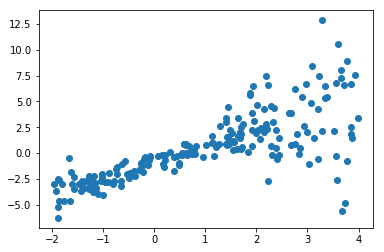

In [18]:
## create a random toy dataset for regression

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low=-2, high=4, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, scale=(0.5 + t*t/3), 
                             size=None)
        y.append(r)
    return x, 1.726*x-0.84 + np.array(y)

X, y = make_random_data()

plt.plot(X, y, 'o')
plt.show()

Now we are ready; let's train the previous model. Let's start by creating a TensorFlow session object called *sess*. Then, we want to initialize our variables which, as we saw, we can do with *sess.run(tf.global_variables_initializer())*. After this, we can create a *for* loop to execute the train operator and calculate the training cost at the same time. 

So let's combine the two tasks, the first to execute an operator, and the second to evaluate a tensor, into one *sess.run* method call. The code for this is as follows:

Epoch    0: 12.2230
Epoch   50: 8.3876
Epoch  100: 6.5721
Epoch  150: 5.6844
Epoch  200: 5.2269
Epoch  250: 4.9725
Epoch  300: 4.8169
Epoch  350: 4.7119
Epoch  400: 4.6347
Epoch  450: 4.5742


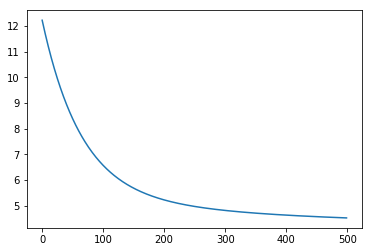

In [21]:
## train/test splits

x_train, y_train = X[:100], y[:100]
x_test, y_test = X[100:], y[100:]

n_epochs = 500
training_costs = []
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    ## train the model for n_epochs
    for e in range(n_epochs):
        c, _  = sess.run([cost, train_op], 
                         feed_dict={tf_x: x_train, 
                                    tf_y: y_train})
        training_costs.append(c)
        if not e % 50:
            print('Epoch %4d: %.4f' % (e, c))
            
plt.plot(training_costs)
plt.show()

# Executing objects in a TensorFlow graph using their names

Executing variables and operators by their names is very useful in many scenarios. For example, we may develop a model in a separate module; and thus the variables are not available in a different Python scope according to Python scoping rules. However, if we have a graph, we can execute the nodes of the graph using their names in the graph. 

This can be done easily by changing the *sess.run* method from the previous code example, using the variable name of the **cost** in the graph rather than the Python variable *cost* by changing *sess.run([cost, train_op], ...)* to *sess.run(['cost:0', 'train_op'], ...)*.

Epoch    0: 12.2230
Epoch   50: 8.3876
Epoch  100: 6.5721
Epoch  150: 5.6844
Epoch  200: 5.2269
Epoch  250: 4.9725
Epoch  300: 4.8169
Epoch  350: 4.7119
Epoch  400: 4.6347
Epoch  450: 4.5742


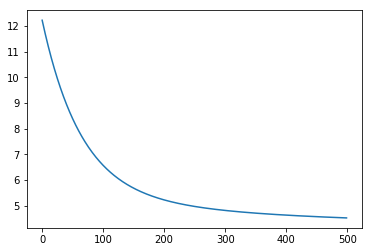

In [22]:
n_epochs = 500
training_costs = []
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    ## train the model for n_epochs
    for e in range(n_epochs):
        c, _  = sess.run(['cost:0', 'train_op'], 
                         feed_dict={'tf_x:0': x_train, 
                                    'tf_y:0': y_train})
        training_costs.append(c)
        if not e % 50:
            print('Epoch %4d: %.4f' % (e, c))
            
plt.plot(training_costs)
plt.show()

Notice that we are evaluating the cost by its name, which is *'cost:0'*, and executing the train operator by its name: *'train_op'*. Also, in *feed_dict*, instead of using *tf_x: x_train*, we are using *'tf_x:0': x_train*. 

If we pay attention to the names of the tensors, we will notice that TensorFlow adds a sufix *':0'* to the name of the tensors. 

However, the names of operators do not have any suffix like that. When a tensor with a given name, such as *name='my_tensor'* is created, TensorFlow appends *':0'*; so the name of this tensor will be *'my_tensor:0'*.

Then, if we try to create another tensor with the same name in the same graph, TensorFlow will append *'_1:0'* and so on to the name; therefore, the future tensors will be named *'my_tensor_1:0'*, *'my_tensor_2:0'*, and so on. This naming assumes that we are not trying to reuse the already created tensor. 

# Saving and restoring a model in TensorFlow

In the previous section, we built a graph and trained it. How about doing the actual prediction on the held out test set? The problem is that we did not save the model parameters; so, once the executing of the preceding statements are finished and we exit the *tf.Session* environment, all the variables and their allocated memories are freed. 

One solution is to train a model, and as soon as the training is finished, we can feed it our test set. However, this is not a good approach since deep neural network models are typically trained over multiple hours, days, or even weeks. 

The best approach is to save the trained model for future use. For this purpose, we need to add a new node to the Graph, an instance of the *tf.train.Saver* class, which we call *saver*. 

In the following statement, we can add more nodes to a particular graph. In this case, we are addding *saver* to the graph *g*: 

In [24]:
with g.as_default():
    saver = tf.train.Saver()

Next, we can retrain the model with an additional call to *saver.save()* to save the model as follows:

In [25]:
n_epochs = 500
training_costs = []
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    ## train the model for n_epochs
    for e in range(n_epochs):
        c, _  = sess.run([cost, train_op], 
                         feed_dict={tf_x: x_train, 
                                    tf_y: y_train})
        training_costs.append(c)
        if not e % 50:
            print('Epoch %4d: %.4f' % (e, c))
            
        saver.save(sess, './trained-model')

Epoch    0: 12.2230
Epoch   50: 8.3876
Epoch  100: 6.5721
Epoch  150: 5.6844
Epoch  200: 5.2269
Epoch  250: 4.9725
Epoch  300: 4.8169
Epoch  350: 4.7119
Epoch  400: 4.6347
Epoch  450: 4.5742


As a result of this new statement, three files are created with extensions *.data*, *.index*, and *.meta*. TensorFlow uses Protocol Buffers, which is a language-agnostic way, for serializing structured data. 

Restoring a trained model requires two steps:

1. Rebuild the graph that has the same nodes and names as the saved model.
2. Restore the saved variables in a new *tf.Session* environment. 

For the first step, we can run the statements, as we did in the first place, to build the graph *g*. But there is a much easier way to do this. Note that all of the information regarding the graph is saved as metadata in the file with the *.meta* extension. Using the following code, we rebuild the graph by importing it from the meta file: 

In [27]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('./trained-model.meta')

The *tf.train.import_meta_graph* function recreates the graph that is saved in the *'./trained-model.meta'* file. After recreating the graph, we can use the *new_saver* object to restore the parameters of the model in that session and execute it. The complete code to run the model on a test set is as follows:

In [28]:
import tensorflow as tf
import numpy as np

g2 = tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver = tf.train.import_meta_graph('./trained-model.meta')
    new_saver.restore(sess, './trained-model')
    
    y_pred = sess.run('y_hat:0', feed_dict={'tf_x:0': x_test})

INFO:tensorflow:Restoring parameters from ./trained-model


Note that we evaluated $ŷ$ tensor by its name that was given previously: *'y_hat:0'*. Also, we needed to feed the values for the *tf_x* placeholder, which is also done by its name: *'tf_x:0'*. In this case, there is no need to feed the values for the true $y$ values. This is because executing the *y_hat* node does not depend on *tf_y* in the computation graph that we built. 

Now, let's visualize the predictions, as follows:

INFO:tensorflow:Restoring parameters from ./trained-model


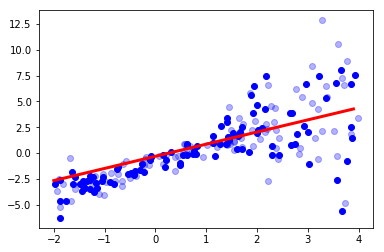

In [29]:
import matplotlib.pyplot as plt

x_arr = np.arange(-2, 4, 0.1)

g2 = tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver = tf.train.import_meta_graph('./trained-model.meta')
    new_saver.restore(sess, './trained-model')
    
    y_arr = sess.run('y_hat:0', feed_dict={'tf_x:0': x_arr})
    
plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr.T[:, 0], '-r', lw=3)
plt.show()

Saving and restoring a model is very often used during the training stage of large models as well. Since the training stage of large models can take several hours to days, we can break the training phase into smaller tasks. For example, if the intended number of epochs is 100, we can break it into 25 tasks, where each task would run four epochs one after the other. For this purpose, we can save the trained model and restore it in the next task.

# Transforming Tensors as multidimensional data arrays

In this section, we explore a selection of operators that can be used to transform tensors. Note that some of these operators work very similar to NumPy array transformations. However, when we are dealing with tensors with ranks higher than 2, we need to be careful in using such transformations, for example, the transpose of a tensor. 

First, as in NumPy, we can use the attribute *arr.shape* to get the shape of a NumPy array. In TensorFlow, we use the *tf.get_shape* function instead: 

In [30]:
import tensorflow as tf
import numpy as np

g = tf.Graph()
with g.as_default():
    arr = np.array([[1., 2., 3., 3.5], 
                    [4., 5., 6., 6.5], 
                    [7., 8., 9., 9.5]])
    T1 = tf.constant(arr, name='T1')
    print(T1)
    s = T1.get_shape()
    print('Shape of T1 is ', s)
    T2 = tf.Variable(tf.random_normal(shape=s))
    print(T2)
    T3 = tf.Variable(tf.random_normal(shape=(s.as_list()[0],)))
    print(T3)

Tensor("T1:0", shape=(3, 4), dtype=float64)
Shape of T1 is  (3, 4)
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(3,) dtype=float32_ref>


Notice that we used *s* to create *T2*, but we cannot slice or index *s* for creating *T3*. Therefore, we converted *s* into a regular Python list by *s.as_list()* and then used the usual indexing conventions. 

Now, let's see how we can reshape tensors. Recall that in NumPy, we can use *np.reshape* or *arr.reshape* for this purpose. In TensorFlow, we use the function *tf.reshape* to reshape a tensor. As is the case for NumPy, one dimension can be set to -1 so that the size of the new dimension will be inferred based on the total size of the array and the other remaining dimensions that are specified. 

In the following code, we reshape the tensor *T1* to *T4* and *T5*, both of which have rank 3: 

In [31]:
with g.as_default():
    T4 = tf.reshape(T1, shape=[1, 1, -1], name='T4')
    print(T4)
    
    T5 = tf.reshape(T1, shape=[1, 3, -1], name='T5')
    print(T5)

Tensor("T4:0", shape=(1, 1, 12), dtype=float64)
Tensor("T5:0", shape=(1, 3, 4), dtype=float64)


Next, let's print the elements of *T4* and *T5*:

In [32]:
with tf.Session(graph=g) as sess:
    print(sess.run(T4))
    print()
    print(sess.run(T5))

[[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]]

[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]]


As we know, there are there ways to transpose an array in NumPy: *arr.T*, *arr.transpose()*, and *np.transpose(arr)*. In TensorFlow, we use the *tf.transpose* function instead, and in addition to a regular transpose operation, we can change the order of dimensions in any way we want by specifying the order in *perm=[...]*. Here is an example: 

In [33]:
with g.as_default():
    T6 = tf.transpose(T5, perm=[2, 1, 0], name='T6')
    print(T6)
    
    T7 = tf.transpose(T5, perm=[0, 2, 1], name='T7')
    print(T7)

Tensor("T6:0", shape=(4, 3, 1), dtype=float64)
Tensor("T7:0", shape=(1, 4, 3), dtype=float64)


Next, we can also split a tensor into a list of subtensors using the *tf.split* function, as follows: 

In [34]:
with g.as_default():
    t5_split = tf.split(T5, num_or_size_splits=2, axis=2, name='T8')
    print(t5_split)

[<tf.Tensor 'T8:0' shape=(1, 3, 2) dtype=float64>, <tf.Tensor 'T8:1' shape=(1, 3, 2) dtype=float64>]


Here, it is important to note that the output is not a tensor object anymore; rather, it is a list of tensors. The name of these subtensors are *'T8:0'* and *'T8:1'*. 

Lastly, another useful transformation is the concatenation of multiple tensors. If we have a list of tensors with the same shape and *dtype*, we can combine them into one big tensor using the *tf.concat* function. An example is given in the following code: 

In [35]:
g = tf.Graph()
with g.as_default():
    t1 = tf.ones(shape=(5, 1), dtype=tf.float32, name='t1')
    t2 = tf.zeros(shape=(5, 1), dtype=tf.float32, name='t2')
    print(t1)
    print(t2)
with g.as_default():
    t3 = tf.concat([t1, t2], axis=0, name='t3')
    print(t3)
    t4 = tf.concat([t1, t2], axis=1, name='t4')
    print(t4)

Tensor("t1:0", shape=(5, 1), dtype=float32)
Tensor("t2:0", shape=(5, 1), dtype=float32)
Tensor("t3:0", shape=(10, 1), dtype=float32)
Tensor("t4:0", shape=(5, 2), dtype=float32)


Let's print the values of these concatenated tensors: 

In [36]:
with tf.Session(graph=g) as sess:
    print(t3.eval())
    print()
    print(t4.eval())

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# Utilizing control flow mechanics in building graphs

Now let's learn about an interesting TensorFlow mechanic. TensorFlow provides a mechanism for making decisions when building a graph. However, there are some subtle differences when we use Python's control flow statements compared to TensorFlow's control flow functions, when constructing computation graphs. 

To illustrate these differences with some simple code examples, let's consider implementing the following equation in TensorFlow: 

$$
res = 
\begin{cases}
    x + y   &\text{if}\, x < y \\
    x - y   &\text{otherwise}
\end{cases}
$$

In the following code, we may naively use Python's *if* statement to build a graph that corresponds to the preceding equation:

In [37]:
import tensorflow as tf

x, y = 1.0, 2.0

g = tf.Graph()
with g.as_default():
    tf_x = tf.placeholder(dtype=tf.float32, 
                          shape=None, name='tf_x')
    tf_y = tf.placeholder(dtype=tf.float32, 
                          shape=None, name='tf_y')
    if x < y:
        res = tf.add(tf_x, tf_y, name='result_add')
    else:
        res = tf.subtract(tf_x, tf_y, name='result_sub')
    
    print('Object:', res)
    
with tf.Session(graph=g) as sess:
    print('x < y: %s -> Result:' % (x < y), res.eval(feed_dict={'tf_x:0': x, 'tf_y:0': y}))
    x, y = 2.0, 1.0
    print('x < y: %s -> Result:' % (x < y), res.eval(feed_dict={'tf_x:0': x, 'tf_y:0': y}))

Object: Tensor("result_add:0", dtype=float32)
x < y: True -> Result: 3.0
x < y: False -> Result: 3.0


As you can see, the *res* object is a tensor named *'result_add:0'*. It is very important to understand that in the previous mechanism, the computation graph has only one branch associated with the addition operator, and the subtract operator has not been called. 

The TensorFlow computation graph is static, which means that once the computation graph is built, it remains unchanged during the executing process. So, even when we change the values of *x* and *y* and feed the new values to the graph, these new tensors will go through the same path in the graph. Therefore, in both cases, we see the same output 3.0 for $x=2,y=1$ and for $x=1,y=2$. 

Now, let's use the control flow mechanics in TensorFlow. In the following code, we implement the previous equation using the *tf.cond* function instead of Python's *if* statement: 

In [38]:
import tensorflow as tf

x, y = 1.0, 2.0

g = tf.Graph()
with g.as_default():
    tf_x = tf.placeholder(dtype=tf.float32, shape=None, name='tf_x')
    tf_y = tf.placeholder(dtype=tf.float32, shape=None, name='tf_y')
    res = tf.cond(tf_x < tf_y, lambda: tf.add(tf_x, tf_y, name='result_add'), 
                               lambda: tf.subtract(tf_x, tf_y, name='result_sub'))
    print('Object:', res)
    
with tf.Session(graph=g) as sess:
    print('x < y: %s -> Result:' % (x < y), res.eval(feed_dict={'tf_x:0': x, 'tf_y:0': y}))
    x, y = 2.0, 1.0
    print('x < y: %s -> Result:' % (x < y), res.eval(feed_dict={'tf_x:0': x, 'tf_y:0': y}))
    

Object: Tensor("cond/Merge:0", dtype=float32)
x < y: True -> Result: 3.0
x < y: False -> Result: 1.0


Here, we can see that the *res* object is named *'cond/Merge:0'*. In this case, the computation graph has two branches with a mechanism to decide which branch to follow at execution time. Therefore, when $x=2,y=1$, it follows the addition branch and the output will be 3.0, while for $x=1,y=2$, the subtraction branch is pursued and the result will be 1.0. 

The following figure contrast the differences in the computation graph of the previous implementation using the Python *if* statement versus TensorFlow's *tf.cond* function:

<img src='images/14_06.png'>

In addition to *tf.cond*, TensorFlow offers several other control flow tensors, such as *tf.case* and *tf.while_loop*. For instance, *tf.case* is the TensorFlow control equivalent to a Python *if...else* statement. Consider the following Python expression: 

In [39]:
if (x < y):
    result = 1
else:
    result = 0

The *tf.case* equivalent to the previous statement for conditional execution in a TensorFlow graph would then be implemented as follows: 

In [40]:
f1 = lambda: tf.constant(1)
f2 = lambda: tf.constant(0)
result = tf.case([(tf.less(x, y), f1)], default=f2)

Similarly, we can add a *while* loop to a TensorFlow graph that increments the *i* variable until a threshold value (*threshold*) is reached, as follows:

In [42]:
i = tf.constant(0)
threshold = 100
c = lambda i: tf.less(i, 100)
b = lambda i: tf.add(i ,1)
t = tf.while_loop(cond=c, body=b, loop_vars=[i])

# Visualizing the graph with TensorBoard

A great feature of TensorFlow is TensorBoard, which is a module for visualizing the graph as well as visualizing the learning of a model. Visualizing the graph allows us to see the connection between nodes, explore their dependencies, and debug the model if needed. 

So let's visualize a network that we have already built, one which consists of a generator and a classifier part. We will repeat some code that we previously used for defining the helper functions. So, revisit the *Reusing variables* section earlier in this chapter, for the function definitions of *build_generator* and *build_classifier*. Using these two helper functions, we will build the graph as follows:

In [43]:
batch_size = 64
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100), 
                          dtype=tf.float32, 
                          name='tf_X')
    ## build the generator
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X, n_hidden=50)
        
    ## build the classifier
    with tf.variable_scope('classifier') as scope:
        ## classifier for the original data:
        cls_out1 = build_classifier(data=tf_X, labels=tf.ones(shape=batch_size))
        ## reuse the classifier for generated data
        scope.reuse_variables()
        cls_out2 = build_classifier(data=gen_out1[1], labels=tf.zeros(shape=batch_size))
    

Note that no changes were needed so far for building the graph. So after building the graph, its visualization is straighforward. The following lines of code export the graph for visualization purposes: 

In [44]:
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    file_writer = tf.summary.FileWriter(logdir='./logs/', graph=g)

This will create a new directory: *logs/*. Now, we just need to run the following command in a terminal: 

**tensorboard --logdir logs**

This command will print a message, which is a URL address. You can try launching TensorBoard by copying the link and pasting it into your browser's address bar. You should see the graph that corresponds to this model, as shown in the following figure: 

<img src='images/14_07.png'>

The large rectangular boxes indicate the two subnetworks that we built: generator and classifier. Since we used the *tf.variable_scope* function when we built this graph, all the components of each of these subnetworks are grouped into those rectangular boxes, as shown in the previous figure. 

We can expand these boxes to explore their details: using your mouse, click on the plus sign on the top-right corner of these boxes to expand them. Doing this, we can see the details of the generator subnetwork, as shown in the following figure:

<img src='images/14_08.png'>

By exploring this graph, we can easily see that the generator has two weight tensors, named *w1* and *w2*. Next, let's expand the classifier subnetwork, as shown in the following figure:

<img src='images/14_09.png'>

As you can see in this figure, the classifier has two sources of input, where one input comes from the *tf_X* placeholder and the other one is in fact the output of the generator subnetwork. 

## Extending your TensorBoard experience

As an interesting exercise, we suggest you use TensorBoard to visualize the different graphs we implemented throughout this chapter. For example, you could use similar steps for building the graphs, and then add extra lines for their visualization. You can also make graphs for the control flow section, which will show you the difference between graphs made by the Python *if* statement and the *tf.cond* function. 

# Summary

In this chapter, we covered in detail the key features and concepts of TensorFlow. We started with discussing TensorFlow's main features and advantages, and key TensorFlow concepts such as ranks and tensors. We then looked at TensorFlow's computation graphs, and discussed how to launch a graph in a session environment, and you learned about placeholders and variables. We then saw different ways to evaluate tensors and execute operators, using Python variables, or by referring to them via their name in the graph. 

We went further to explore some of the essential TensorFlow operators and functions for transforming tensors, such as *tf.transpose*, *tf.reshape*, *tf.split*, and *tf.concat*. Finally, we saw how to visualize a TensorFlow computation graph using TensorBoard. Visualizing computation graphs using this module can be very useful, especially when we are debugging complex models. 

In the next chapter, we will make use of this library to implement an advanced image classifier: a **Convolutional Neural Network (CNN)**. CNNS are powerful models and have shown great performance in image classification and computer vision. We will cover the basic operations in CNNs, and we will implement deep convolutional networks for image classification using TensorFlow. 